In [ ]:
# Import required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from numpy import mean, std
from sklearn import metrics, preprocessing
from sklearn.model_selection import KFold, train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, make_scorer

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Task 1

In [ ]:
# Load the titanic dataset
dt = pd.read_csv('titanic.csv')

#Task 2

In [ ]:
# Read the dataset
dt

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0000,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN


#Task 3

In [ ]:
# Shows the shape of the data
# data.info()
dt.shape

(1310, 14)

#Task 4

In [ ]:
# Describe the data columns datatypes
dt.dtypes

pclass       float64
survived     float64
name          object
sex            int64
age          float64
sibsp        float64
parch        float64
ticket        object
fare         float64
cabin          int64
embarked       int64
boat           int64
body         float64
home.dest     object
dtype: object

# Task 5

In [ ]:
# Sample view of the dataset
dt.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


#Task 6

In [ ]:
# View dirty data
dt.isna().sum()

pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64

#Task 7

In [ ]:
# This function encodes non integer/float datatypes into an incremental value
le = preprocessing.LabelEncoder()

def encode(data):
  cols = ['sex', 'cabin', 'embarked', 'boat']
  for col in cols:
    le.fit(data[col])
    data[col] = le.transform(dt[col])
    # data[col] = le.inverse_transform(dt[col])
  return data

In [ ]:
# Process the dataset into the encode function
data = encode(dt)

In [ ]:
# This function cleans the dataset
def clean(data):
  data = data.drop(['name', 'ticket', 'home.dest'], axis=1)

  cols = ['age', 'cabin', 'embarked']
  for col in cols:
    data[col].fillna(data[col].median(), inplace=True)
  data.embarked.fillna('U', inplace=True)
  return data

In [ ]:
data = clean(data)

In [ ]:
data.isna().sum()

pclass         1
survived       1
sex            0
age            0
sibsp          1
parch          1
fare           2
cabin          0
embarked       0
boat           0
body        1189
dtype: int64

In [ ]:
# This will finally fill the last missing values on the dataset
data.fillna(method='ffill', inplace=True)
data.fillna(method='bfill', inplace=True)

In [ ]:
# The clean dataset
data.isna().sum()

pclass      0
survived    0
sex         0
age         0
sibsp       0
parch       0
fare        0
cabin       0
embarked    0
boat        0
body        0
dtype: int64

#Task 8

In [ ]:
# MEAN & STD
data.describe()

,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked,boat,body
count,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000
mean,2.295420,0.381679,0.645038,29.502036,0.498473,0.384733,33.256803,165.912977,1.496183,21.580916,171.938931
std,0.837742,0.485984,0.480278,12.900383,1.041352,0.865295,51.728577,44.773840,0.816877,8.483792,93.061260
min,1.000000,0.000000,0.000000,0.166700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,22.000000,0.000000,0.000000,7.895800,186.000000,1.000000,17.000000,97.000000
50%,3.000000,0.000000,1.000000,28.000000,0.000000,0.000000,14.454200,186.000000,2.000000,27.000000,171.000000
75%,3.000000,1.000000,1.000000,35.000000,1.000000,0.000000,31.275000,186.000000,2.000000,27.000000,260.750000
max,3.000000,1.000000,2.000000,80.000000,8.000000,9.000000,512.329200,186.000000,3.000000,27.000000,328.000000


In [ ]:
# MEDIAN
data.median()

pclass        3.0000
survived      0.0000
sex           1.0000
age          28.0000
sibsp         0.0000
parch         0.0000
fare         14.4542
cabin       186.0000
embarked      2.0000
boat         27.0000
body        171.0000
dtype: float64

In [ ]:
# MODE
data.mode()

,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked,boat,body
0,3.0,0.0,1.0,28.0,0.0,0.0,8.05,186.0,2.0,27.0,142.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,287.0


In [ ]:
# VARIANCE
data.var()

pclass         0.701812
survived       0.236181
sex            0.230667
age          166.419876
sibsp          1.084413
parch          0.748735
fare        2675.845648
cabin       2004.696776
embarked       0.667289
boat          71.974731
body        8660.398101
dtype: float64

In [ ]:
data.min()

pclass      1.0000
survived    0.0000
sex         0.0000
age         0.1667
sibsp       0.0000
parch       0.0000
fare        0.0000
cabin       0.0000
embarked    0.0000
boat        0.0000
body        1.0000
dtype: float64

In [ ]:
# RANGE
data.max() - data.min()

pclass        2.0000
survived      1.0000
sex           2.0000
age          79.8333
sibsp         8.0000
parch         9.0000
fare        512.3292
cabin       186.0000
embarked      3.0000
boat         27.0000
body        327.0000
dtype: float64

In [ ]:
# This is a function to identify possible outliers
data.describe()

,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked,boat,body
count,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000
mean,2.295420,0.381679,0.645038,29.502036,0.498473,0.384733,33.256803,165.912977,1.496183,21.580916,171.938931
std,0.837742,0.485984,0.480278,12.900383,1.041352,0.865295,51.728577,44.773840,0.816877,8.483792,93.061260
min,1.000000,0.000000,0.000000,0.166700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,22.000000,0.000000,0.000000,7.895800,186.000000,1.000000,17.000000,97.000000
50%,3.000000,0.000000,1.000000,28.000000,0.000000,0.000000,14.454200,186.000000,2.000000,27.000000,171.000000
75%,3.000000,1.000000,1.000000,35.000000,1.000000,0.000000,31.275000,186.000000,2.000000,27.000000,260.750000
max,3.000000,1.000000,2.000000,80.000000,8.000000,9.000000,512.329200,186.000000,3.000000,27.000000,328.000000


#Task 9

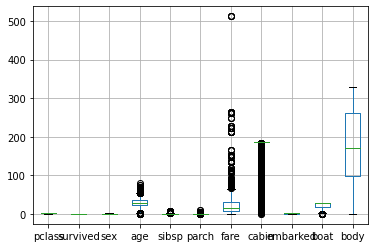

In [ ]:
# BOXPLOT
data.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f131ef9d210>,
      dtype=object)

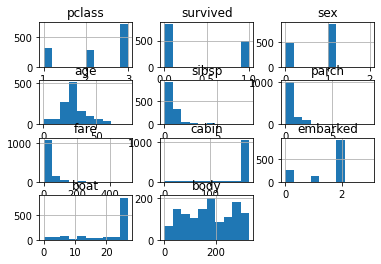

In [ ]:
# HISTOGRAM
data.hist()